In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import logging
from pathlib import Path
import matplotlib.style as style
import yaml

# Set up file paths
file_path = str(Path().absolute())
project_path = str(Path().absolute().parent.parent)
exp_name = file_path.split('/')[-1]

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info(f"Current file directory: {file_path}")
logging.info(f"Current project directory: {project_path}")

os.chdir(project_path)
sys.path.append(project_path)

# Load style configuration from YAML file
with open('plot_style.yml', 'r') as file:
    style_config = yaml.safe_load(file)
    font_size = style_config['font_size']

plt.rcParams.update({'font.size': font_size})

2023-06-28 17:42:12,377 - INFO - Current file directory: /Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves/exp/signal-to-signal-correlation&coherence
2023-06-28 17:42:12,378 - INFO - Current project directory: /Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves


In [2]:
# Set input directory for data
input_dir = f"data/processed/2022-09-27-data/1kHz"

In [3]:
# Read ecog data
ecog_path = f"{input_dir}/ts_filtered_ecog.npy"
ecog_times_path = f"{input_dir}/times.npy"
ts_ecog = np.load(ecog_path)
times_ecog = np.load(ecog_times_path)

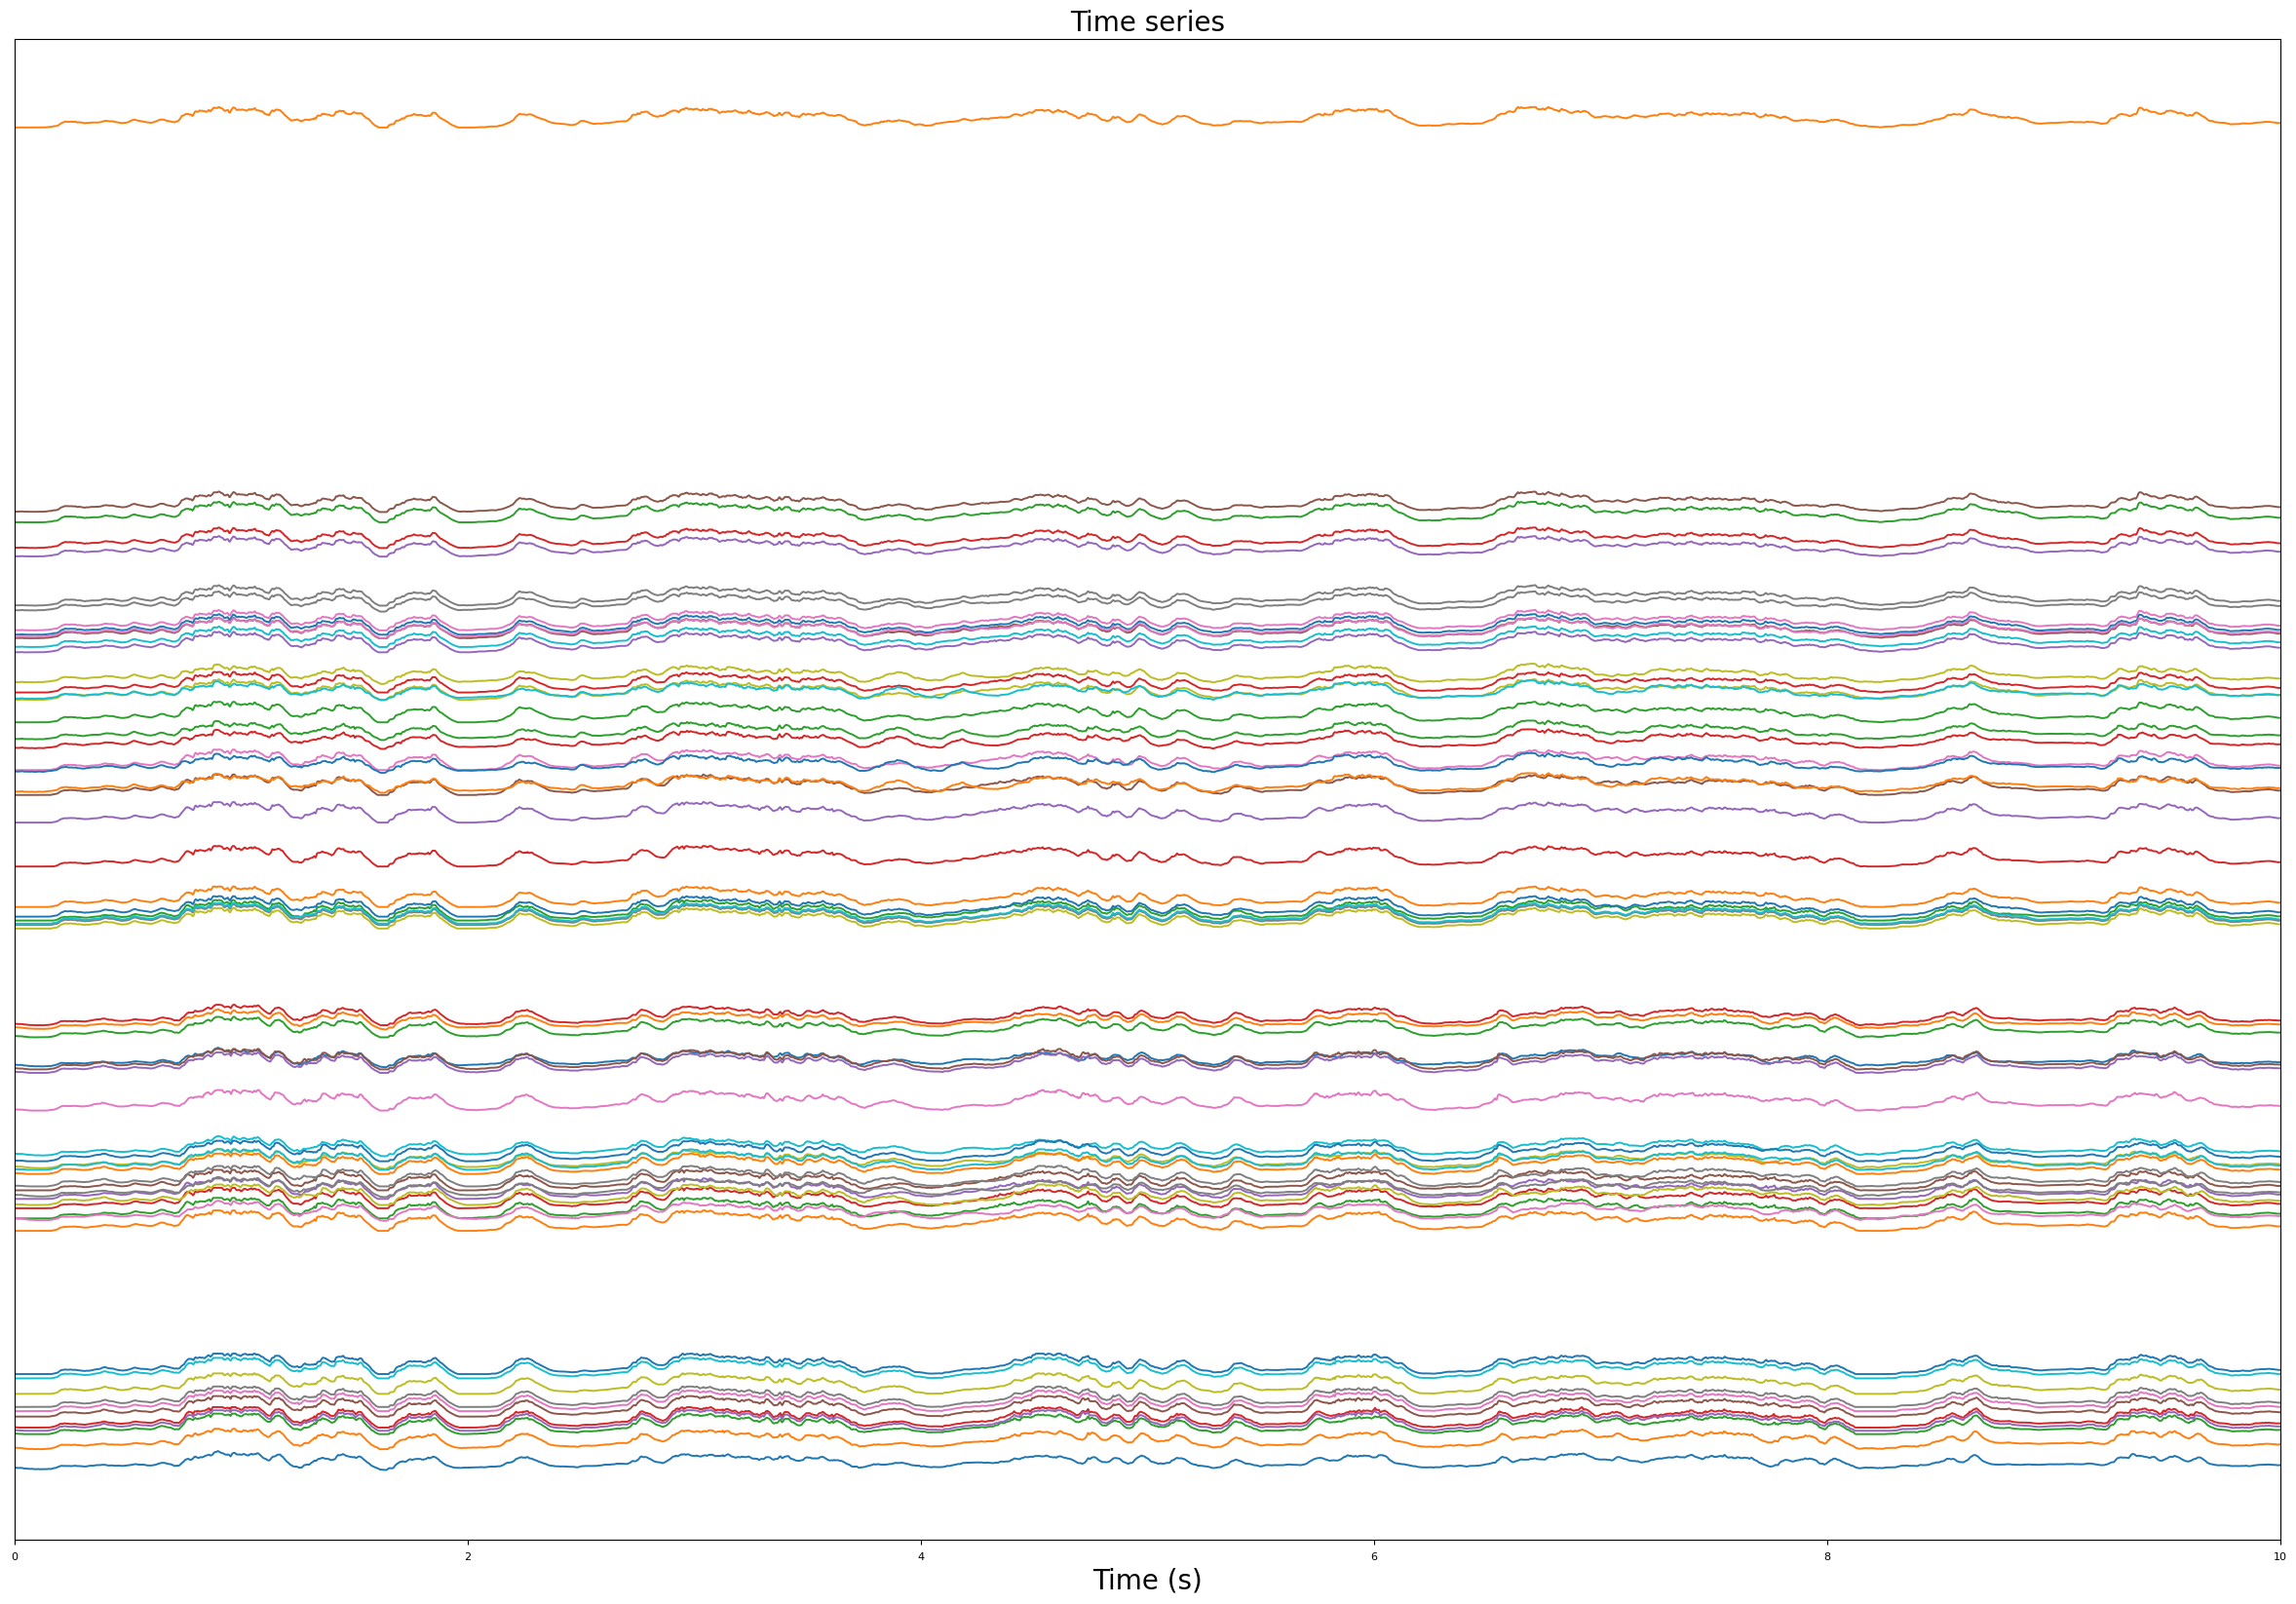

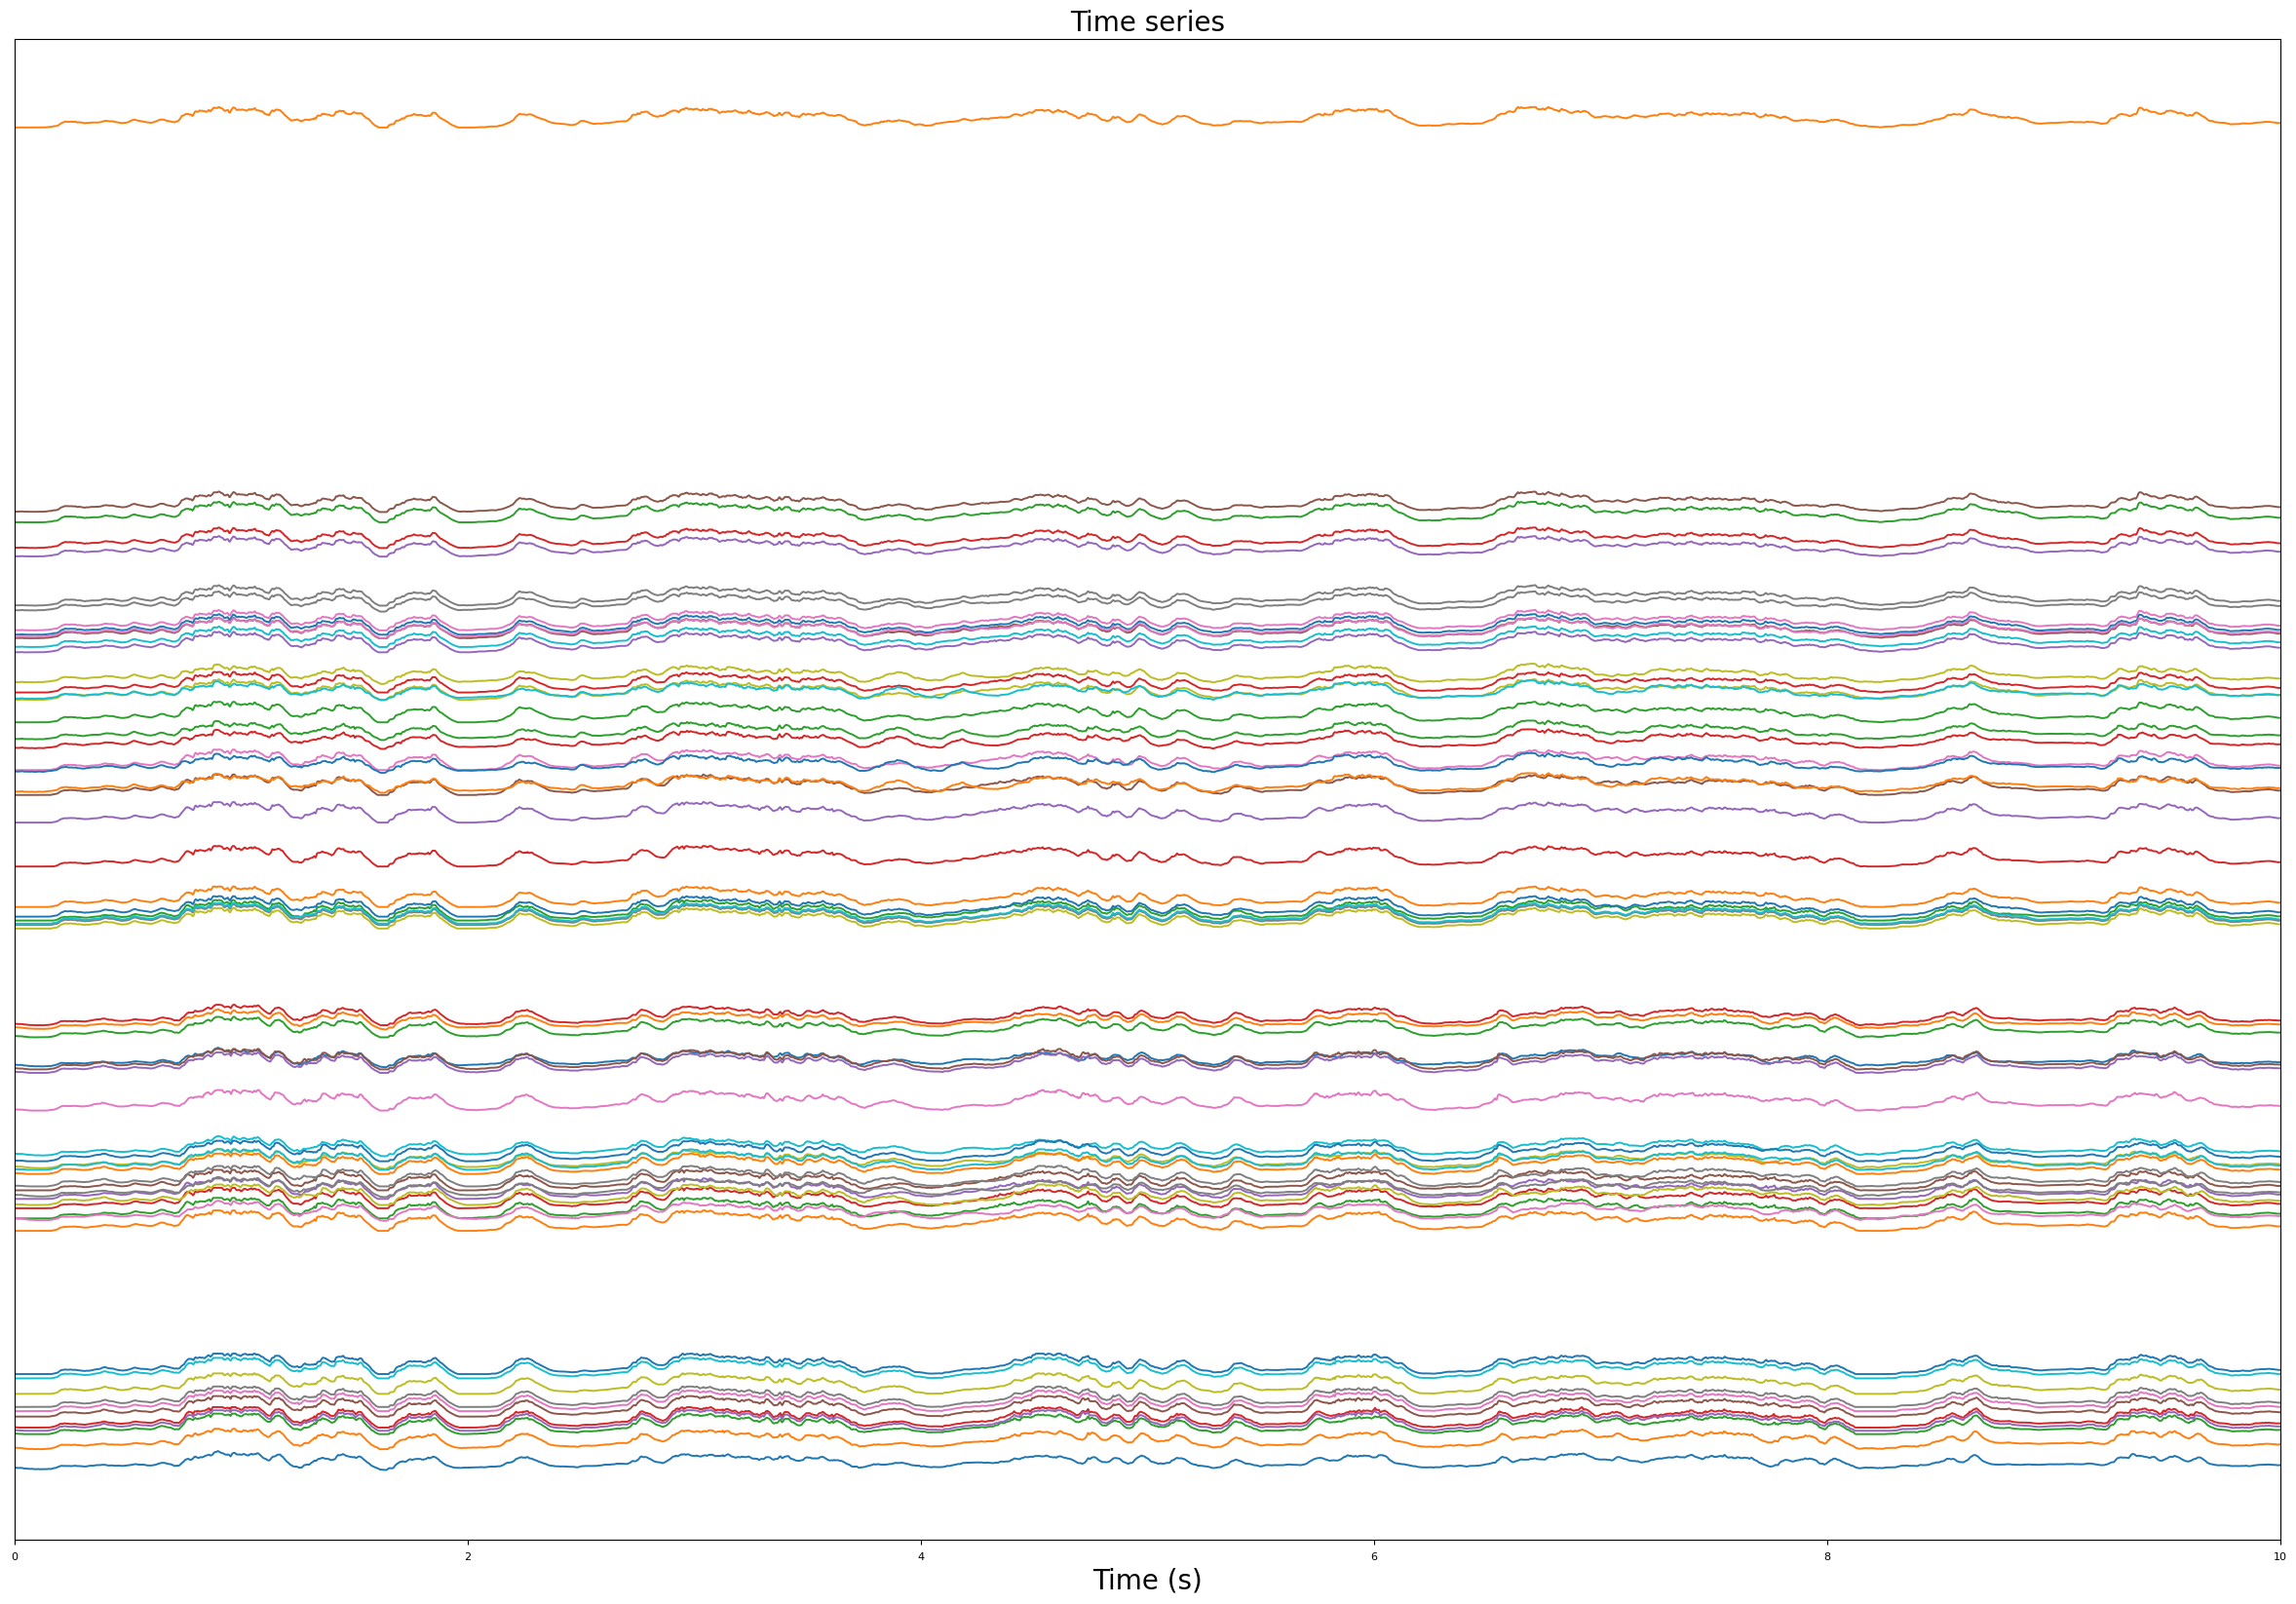

In [4]:
from src.plotting import plot_time_series_snippet

# Plot a random channel
plot_time_series_snippet(ts_ecog, times_ecog, channel=-1, xlim=(0, 10), filename='ecog_ts', fig_output_dir='res/signal-to-signal-correlation&coherence')

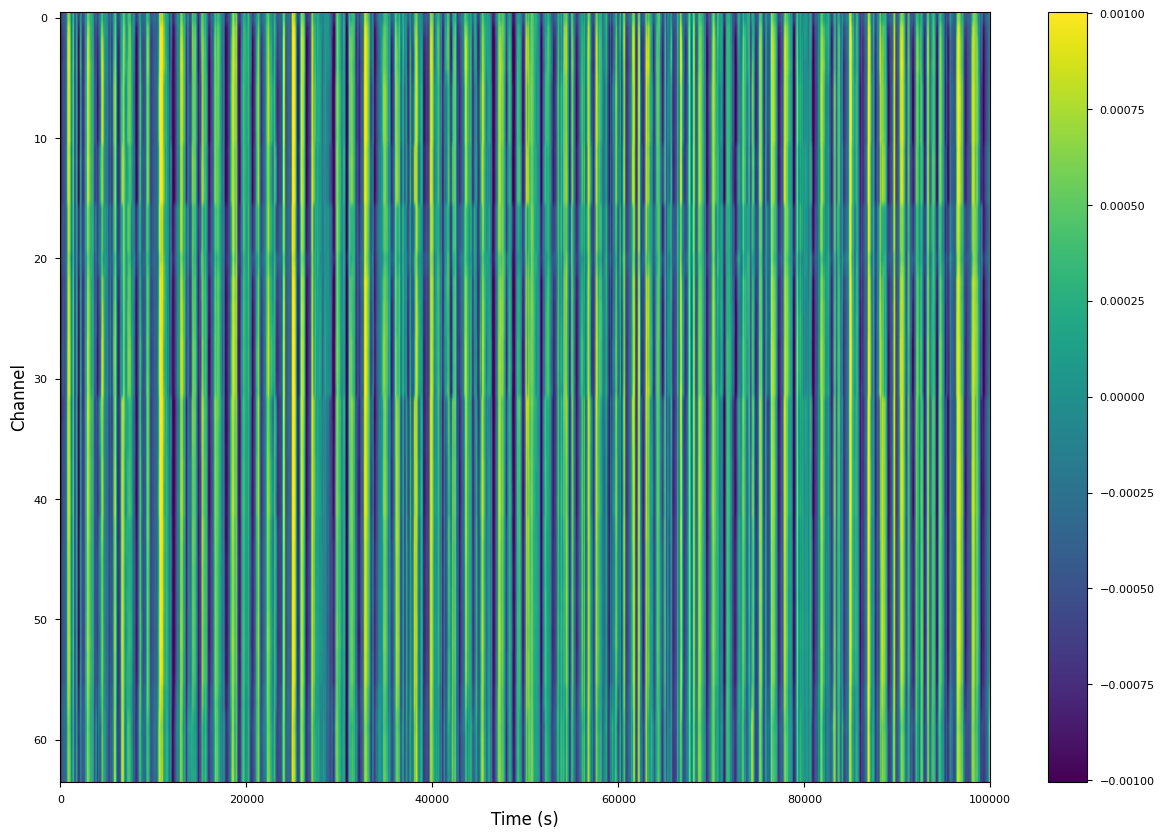

In [8]:
# Plot data as a heatmap
plt.figure(figsize=(15, 10))
plt.imshow(ts_ecog, aspect='auto')
plt.xlabel('Time (s)', fontsize=font_size)
plt.ylabel('Channel', fontsize=font_size)
# Set xlim to 10 seconds
plt.xlim(0, 100000)
plt.colorbar()
plt.savefig('res/signal-to-signal-correlation&coherence/ecog_ts_heatmap.png', dpi=300)

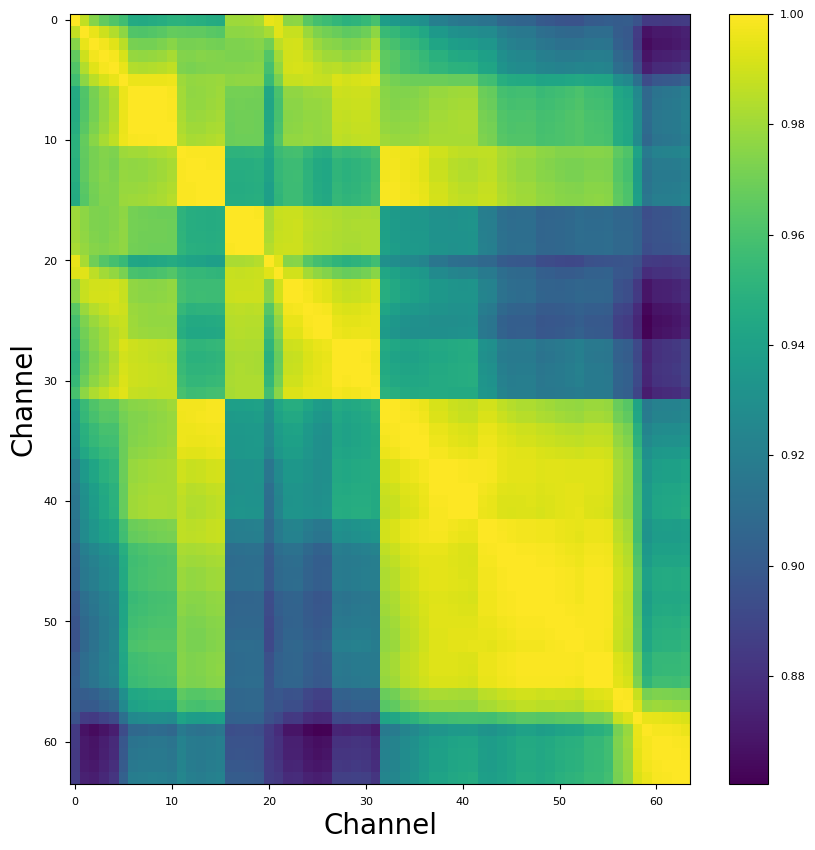

In [5]:
# compute correlation matrix
corr_matrix = np.corrcoef(ts_ecog)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, aspect='auto')
plt.xlabel('Channel', fontsize=font_size)
plt.ylabel('Channel', fontsize=font_size)
plt.colorbar()
plt.savefig('res/signal-to-signal-correlation&coherence/ecog_corr_heatmap.png', dpi=300)

(0.0, 1.0)

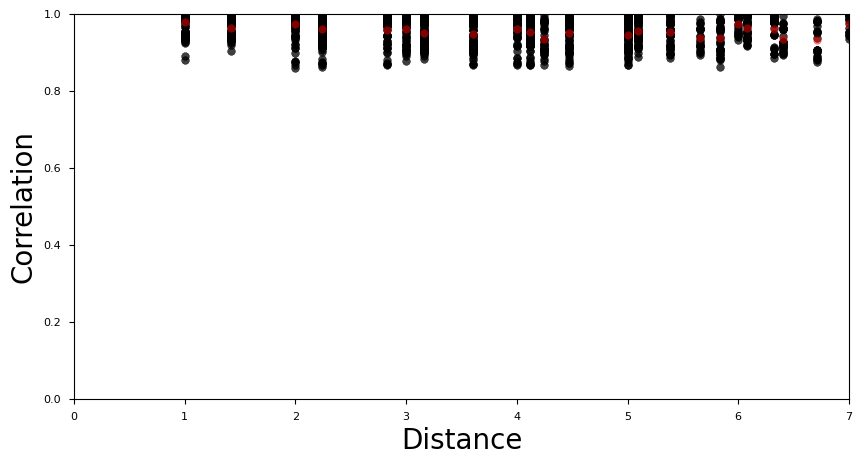

In [29]:
# organize data according to channel map
channel_map = np.array([[49,50,51,52,59,58,57,56,55,54,53],
                        [60,61,62,63,32,43,44,45,46,47,65],
                        [42,41,40,39,38,33,34,35,36,37,65],
                        [26,25,24,23,22,17,18,19,20,21,65],
                        [12,13,14,15,16,27,28,29,30,31,65],
                        [1,2,3,4,11,10,9,8,7,6,5]])


# Go through each pair of channels, compute distance between them, and plot correlation vs distance
from scipy.spatial.distance import euclidean

# Set up figure
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.set_xlabel('Distance', fontsize=font_size)
ax.set_ylabel('Correlation', fontsize=font_size)

channels = range(1, 64)
# print(channels) 
corrs = []
distances = []
for i in channels:
    for j in channels:
        if i == j:
            continue

        # print(f"Computing distance and correlation for channels {i} and {j}")
        # Get coordinates of the two channels
        coord1 = np.where(channel_map == i)
        coord2 = np.where(channel_map == j)

        # Check if the channel is in the channel map
        if len(coord1[0]) == 0 or len(coord2[0]) == 0:
            continue

        # Concatenate coordinates
        coord1 = np.concatenate((coord1[0], coord1[1]))
        coord2 = np.concatenate((coord2[0], coord2[1]))
        # print(coord1, coord2)
        # Compute distance
        distance = euclidean(coord1, coord2)
        # print(f"Distance between channels {i} and {j}: {distance}")
        # Compute correlation
        corr = corr_matrix[i-1, j-1]
        # Append to list
        corrs.append(corr)
        distances.append(distance)

        # # Plot
        # ax.scatter(distance, corr, color='k', alpha=0.5)
        # ax.set_xlim(0, 7)
        # ax.set_ylim(0, 1)

# Plot
ax.scatter(distances, corrs, color='k', alpha=0.5)
# also plot the mean correlation for each distance
mean_corrs = []
for d in np.unique(distances):
    mean_corrs.append(np.mean(np.array(corrs)[np.where(np.array(distances) == d)]))
ax.scatter(np.unique(distances), mean_corrs, color='r', alpha=0.5)
ax.set_xlim(0, 7)
ax.set_ylim(0, 1)
# plt.savefig('res/signal-to-signal-correlation&coherence/ecog_corr_vs_distance.png', dpi=300)
# ax.set_xlim(0, 7)
# ax.set_ylim(0, 1)
# plt.savefig('res/signal-to-signal-correlation&coherence/ecog_corr_vs_distance.png', dpi=300)
